# Custom Metrics

ModelSkill comes with many metrics to choose from, but you can also
define your own.

In [1]:
import numpy as np
import modelskill as ms

In [2]:
mr = ms.DfsuModelResult("../data/SW/HKZN_local_2017_DutchCoast.dfsu", name='HKZN_local', item=0)
o1 = ms.PointObservation("../data/SW/HKNA_Hm0.dfs0", item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation("../data/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = ms.TrackObservation("../data/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")
cc = ms.match([o1, o2, o3], mr)
cc

<ComparerCollection>
Comparers:
0: HKNA - Significant wave height [m]
1: EPL - Significant wave height [m]
2: c2 - Significant wave height [m]

Standard set of metrics

In [3]:
cc.skill()

Some metrics has parameters, which require a bit special treatment.

In [4]:
from modelskill.metrics import hit_ratio, metric

@metric(best="+")
def hit_ratio_05_pct(obs, model):
    return hit_ratio(obs, model, 0.5) * 100

@metric(best="+")
def hit_ratio_01_pct(obs, model):
    return hit_ratio(obs, model, 0.1) * 100


cc.skill(metrics=[hit_ratio_05_pct, hit_ratio_01_pct])

And you are always free to specify your own special metric or import
metrics from other libraries, e.g. scikit-learn.

In [5]:
@metric(best="-", has_units=True)
def mcae(obs, model):

    res = obs - model

    res_clipped = np.clip(res,0,np.inf)

    return np.mean(np.abs(res_clipped))


cc.skill(metrics=mcae).style()

## Custom display name

Sometimes you like to modify the display name of the metrics. This can
be done by passing a dictionary with the metric name as key and the
display name as value to the `display_name` parameter.

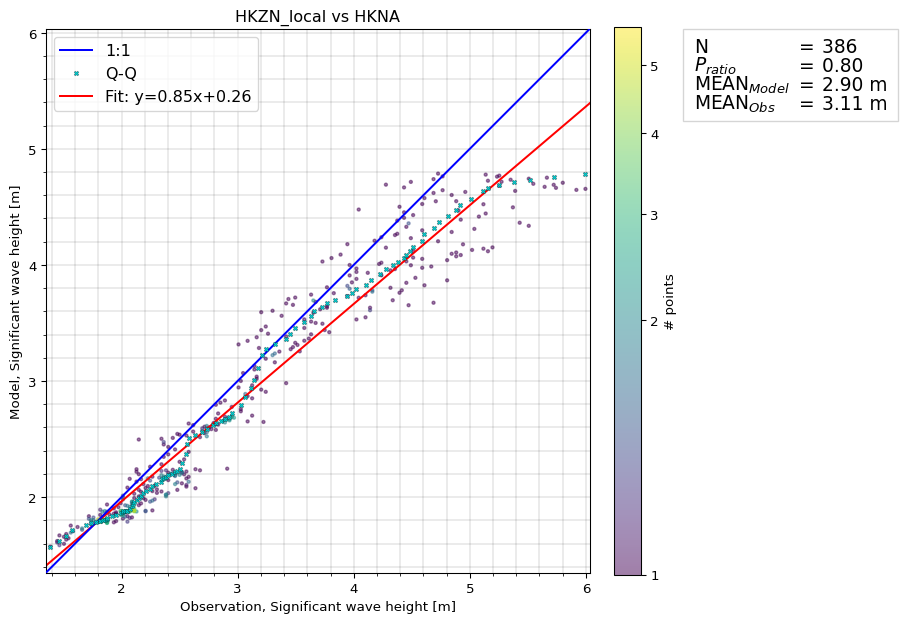

In [6]:
@ms.metrics.metric(display_name="MEAN$_{Model}$", has_units="m")
def mean_mod(obs, mod):
    return mod.mean()

@ms.metrics.metric(display_name="MEAN$_{Obs}$", has_units="m")
def mean_obs(obs, mod):
    return obs.mean()

ms.metrics.add_metric(mean_mod)
ms.metrics.add_metric(mean_obs)

ms.metrics.pr.display_name = '$P_{ratio}$'
cc[0].plot.scatter(skill_table=["pr", mean_mod, mean_obs]);

## Custom format

In this example we modify `bias` to also add the perentage of the bias
relative to the mean of the reference series.

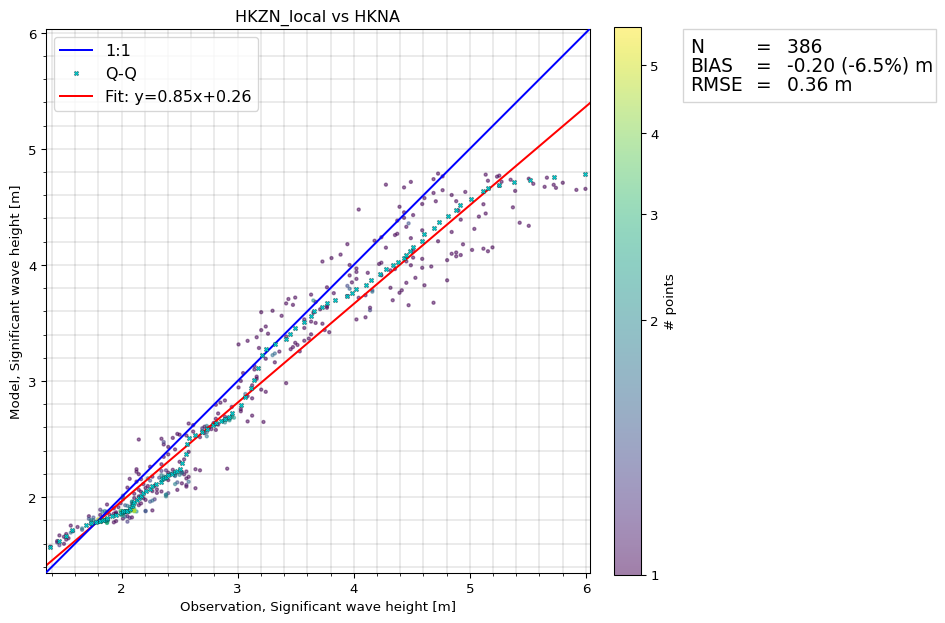

In [7]:
from modelskill.metrics import bias as mybias

def bias(obs, mod):
    avg = obs.mean()
    bias = mybias(obs, mod)
    sign = "+" if bias > 0 else ""
    return f"{bias:.2f} ({sign}{bias/avg*100:.1f}%)"

cc[0].plot.scatter(skill_table=[bias, "rmse"]);